In [1]:
import tensorflow as tf

# 导入minist
mnist = tf.keras.datasets.mnist
# 分割数据,训练集6万,测试集1万
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("训练集: %s,测试集: %s " % (len(x_train), len(x_test)))

训练集: 60000,测试集: 10000 


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

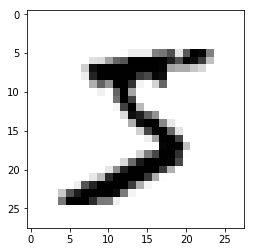

In [2]:
# 像素矩阵 28x28
print(x_train[0])

import matplotlib.pyplot as plt
# 加上这句才能在notebook环境显示图像
%matplotlib inline 
# 显示黑白图像
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [3]:
# 归一化处理,图像的像素值被限定在了0和1之间
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


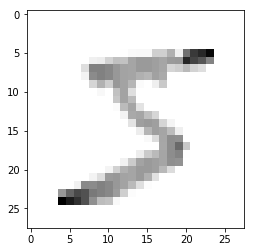

In [4]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [5]:
print(x_train[0])

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

## 3 构建与训练模型

In [6]:
# 使用Keras的Sequential模型.最常用的模型，也就是一个按照顺序向前传递的神经网络。
model = tf.keras.models.Sequential()


神经网络的输入层是一个一维向量,所以我们需要把输入的图像矩阵展平，从 28 x 28 变为 1 x 784 。

In [7]:
# 为神经网络模型添加输入层
model.add(tf.keras.layers.Flatten())

# 添加隐藏层
# 使用最简单的Dense层,即全连接层,每一个神经元与前后两层的所有神经元相连
# 激活函数reLU,最初人们喜欢用Sigmoid,后来发现reLU效果更好,算是默认选择了
# 128个节点
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

# 再添加一个相同的层
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

# 再添加输出层
# 输出层10个节点,代表10个不同的数字
# 激活函数softmax,因为我们想要得到预测结果的概率分布(0-1之间的值)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [8]:
# 编译模型
# 优化器默认adam,损失函数指定为sparse_categorical_crossentropy,即计算分类结果的交叉熵损失
# metrics 列表,参数为评估模型性能的指标,此处为典型用法
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 拟合模型
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 67us/step - loss: 0.2661 - acc: 0.9226
Epoch 2/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.1093 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 3s 45us/step - loss: 0.0735 - acc: 0.9772


在训练的过程中，我们会发现损失值（loss）在降低，而准确度（accuracy）在提高，最后达到了一个令人满意的程度。
深度学习的优化算法，说白了就是梯度下降。每次的参数更新有两种方式。

第一种，遍历全部数据集算一次损失函数，然后算函数对各个参数的梯度，更新梯度。这种方法每更新一次参数都要把数据集里的所有样本都看一遍，计算量开销大，计算速度慢，不支持在线学习，这称为Batch gradient descent，批梯度下降。

另一种，每看一个数据就算一下损失函数，然后求梯度更新参数，这个称为随机梯度下降，stochastic gradient descent。这个方法速度比较快，但是收敛性能不太好，可能在最优点附近晃来晃去，hit不到最优点。两次参数的更新也有可能互相抵消掉，造成目标函数震荡的比较剧烈。

为了克服两种方法的缺点，现在一般采用的是一种折中手段，mini-batch gradient decent，小批的梯度下降，这种方法把数据分为若干个批，按批来更新参数，这样，一个批中的一组数据共同决定了本次梯度的方向，下降起来就不容易跑偏，减少了随机性。另一方面因为批的样本数与整个数据集相比小了很多，计算量也不是很大。

现在用的优化器SGD是stochastic gradient descent的缩写，但不代表是一个样本就更新一回，还是基于mini-batch的。

那 batch epoch iteration代表什么呢？


（1）batchsize：批大小。在深度学习中，一般采用SGD训练，即每次训练在训练集中取batchsize个样本训练；

（2）iteration：1个iteration等于使用batchsize个样本训练一次；

（3）epoch：1个epoch等于使用训练集中的全部样本训练一次，通俗的讲epoch的值就是整个数据集被轮几次。

比如训练集有500个样本，batchsize = 10 ，那么训练完整个样本集：iteration=50，epoch=1.

batch: 深度学习每一次参数的更新所需要损失函数并不是由一个数据获得的，而是由一组数据加权得到的，这一组数据的数量就是batchsize。

batchsize最大是样本总数N，此时就是Full batch learning；最小是1，即每次只训练一个样本，这就是在线学习（Online Learning）。当我们分批学习时，每次使用过全部训练数据完成一次Forword运算以及一次BP运算，成为完成了一次epoch。

## 4 测试模型

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)

# 损失和准确度
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 23us/step
0.100210128606
0.9685


[[  5.00924273e-07   2.95704893e-07   5.72080608e-05 ...,   9.99832392e-01
    4.33415011e-07   9.02375916e-07]
 [  4.29593729e-06   2.19539413e-03   9.97662306e-01 ...,   9.11560827e-10
    1.41054170e-06   2.43221532e-09]
 [  8.66205141e-07   9.98711944e-01   1.58142095e-04 ...,   1.09416072e-03
    1.58860166e-05   3.45443851e-07]
 ..., 
 [  1.66386471e-07   3.67057226e-07   6.60154029e-08 ...,   3.36352059e-05
    1.92659631e-04   2.74228572e-04]
 [  2.64443115e-05   7.52976348e-07   1.72736236e-07 ...,   2.40773716e-06
    2.08477140e-03   5.85303574e-08]
 [  1.10094004e-06   3.35248416e-07   2.66201681e-07 ...,   2.97094488e-10
    1.99549163e-07   4.29244806e-10]]
7


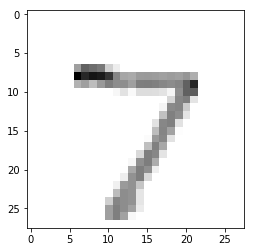

In [11]:
# 尝试预测
predictions = model.predict(x_test)
print(predictions)
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()